# Уравнение диффузии в цилиндрических координатах

Задача о нестационарной диффузии с неоднородным граничным условием:

$$ \frac{\partial \tilde{u}}{\partial t} = D \Delta \tilde{u} = D \left( \frac{\partial^2 \tilde{u}}{\partial r^2} + \frac{1}{r} \frac{\partial \tilde{u}}{\partial r} \right), \quad \tilde{u}(t=0) = \tilde{\varphi}(r), \quad \tilde{u}(r=R) = u_0. $$

Задача о нестационарной диффузии с однородным граничным условием с нулевым начальным распределением:

$$ \frac{\partial u}{\partial t} = D \left( \frac{\partial^2 u}{\partial r^2} + \frac{1}{r} \frac{\partial u}{\partial r} \right), \quad u(t=0) = \varphi(r) = -u_0, \quad u(r=R) = 0, \quad \tilde{u} = u + u_0, \quad \tilde{\varphi}(r)=0.$$

Общее решение этой краевой задачи имеет вид:

$u(r,t) = \sum_{k=1}^{\infty} C_k e^{-\lambda^2_kDt}J_0(\lambda_kr),$ где $J_0$ - функция Бесселя нулевого порядка, $\lambda_k = \mu_k/R$, $\mu_k$ - нули функции Бесселя нулевого порядка.
Коэффициенты разложения $C_k$ выражаются в виде:
$C_k = \frac{2}{J_0^{\prime 2}(\mu_k)} \int_0^1 x J_0(\mu_kx) \varphi(Rx)dx$.

-0.2158774035098401
0.06164130285118731
-0.03136824992190776
0.019714129027651576
-0.0138334720685374
0.010388364701369706
-0.00816843590395862
0.006640046801207554
-0.005535174833266015
0.004705984319887777
-0.0040649477211903975
0.0035572846330062333
-0.003147140575818453
0.0028101669002890527
-0.0025293093036505097
0.0022923041620404837
-0.0020901306379517742
0.001916020974399405
-0.0017648089571147222
0.0016324898946886153
-0.0015159166614688321
0.0014125854662765938
-0.0013204821159990556
0.001237969885567429
-0.0011637065221553188
0.0010965819855210364
-0.0010356711682556895
0.0009801975859107463
-0.0009295052015707594
0.0008830363523289982
-0.0008403143021218275
0.0008009293371150179
-0.0007645275988613289
0.0007308020515520039
-0.0006994851262288948
0.0006703426927149386
-0.0006431690902209508
0.0006177830077461047
-0.000594024050898898
0.0005717498664718008
-0.0005508337227687144
0.0005311624643219313
-0.0005126347757138705
0.0004951597018279081
-0.0004786553817990573
0.000463

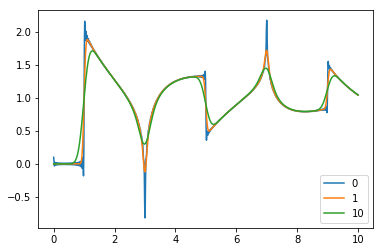

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j0 as J
from scipy.special import jvp as Jderiv
from scipy.special import jn_zeros as Jzeros
from scipy.integrate import quad

R = 1.
D = 1.E-2
u0 = 1.
Ncoef = 50

tmax = 10
Ntimesteps = 101
Rmax = 10.
Nspacesteps = 1001

t = np.linspace(0, tmax, Ntimesteps)
r = np.linspace(0, Rmax, Nspacesteps)
mu = Jzeros(0,Ncoef)
lambd = mu/R
C = np.empty(Ncoef,float)
u = np.zeros((Ntimesteps,Nspacesteps),float)


def f(x,i):
    return -u0*x*J(mu[i]*x)

for i in range(Ncoef):
    integl = quad(f, 0., 1., args=(i))[0]
    print(integl)
    C[i] = 2./Jderiv(0,mu[i])**2*integl
    u += C[i]*np.outer(np.exp(-lambd[i]**2*D*t),J(lambd[i]*r))
u = u0 + u

plt.plot(r,u[0,:],label='0')
plt.plot(r,u[1,:],label='1')
plt.plot(r,u[10,:],label='10')
plt.legend()
plt.show()

# Конечные разности. Явная схема

In [90]:
def FindValue(u):
    res = 0
    for i in range(Nr):
        if u[i]<0.01*u0:
            res = i
            break
    #print(res)
    return res

Максимальный шаг по времени для устойчивой явной схемы:  0.005


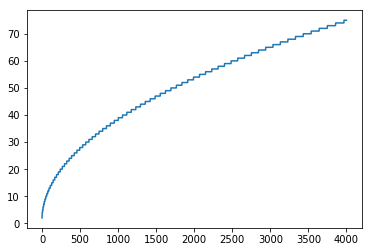

In [92]:
Nr = 1000
h = Rmax/Nr
u = np.zeros(Nr,float)
unew = np.zeros(Nr,float)
u[0] = u0
unew[0] = u0
tau = 0.001
print('Максимальный шаг по времени для устойчивой явной схемы: ', 0.5*h**2/D)
Nt = 4000
front = np.empty(Nt, int)
for t in range(Nt):
    for i in range(1,Nr-1):
        unew[i] = u[i] + tau*D/h**2*(u[i+1]-2*u[i]+u[i-1]+0.5*(u[i+1]-u[i-1])/(100+i)) #
    u=unew
    front[t]=FindValue(u)

plt.plot(front)
plt.show()

Зависимомость скорости диффузии в 1D и в 2D конфигурациях
Наявная схема для уравнения диффузии

In [85]:
print(Nr)

1000
